# Exercise 4.9 - Part 2 Intro to data visualiation with Python

## Contents

#### 1- Import Libraries
#### 2- Import the dataframe
#### 3- Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart
#### 4- Create a histogram of the “order_hour_of_day” column
#### 5- Create a bar chart from the “loyalty_flag” column
#### 6- Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day
#### 7- Create a line chart to determine whether there’s a connection between age and family situation
#### 8- Create a scatterplot to explore whether there’s a connection between age and spending power (income).


In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Assigning the folder path to a variable
path = r"C:\Users\Toshiba\09-10-2023 Instacart Basket Analysis"

In [6]:
# Importing the dataframe 'orders_products_customers_merge.pkl' with os library

df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merge.pkl'))

In [ ]:
                            # Sampling Data

In [13]:
# Creating a sample with 70/30 Split. It creates a list holding True/False values to the test np.random.rand() <=0.7

np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [8]:
# Checking the output
dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
# np.random.rand() function produces a list of random numbers between 0 and 1. Here, the argument is 10, so 10 random numbers
# are produced. In the code above, the argument given is the length of your dataframe, so 32,434,212 numbers are produced.

np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [14]:
# Store 70% of the data sample in the dataframe big

big = df_merged[dev]


In [15]:
# Store 30% of the data sample in the dataframe small

small = df_merged[~dev]

In [16]:
len(df_merged)

32404859

In [17]:
# this shows that the data has been correctly distributed
len(big) + len(small)

32404859

In [ ]:
                         # Exercise 4.9 - Part 2 - Number 2
                         # Charts from the sample

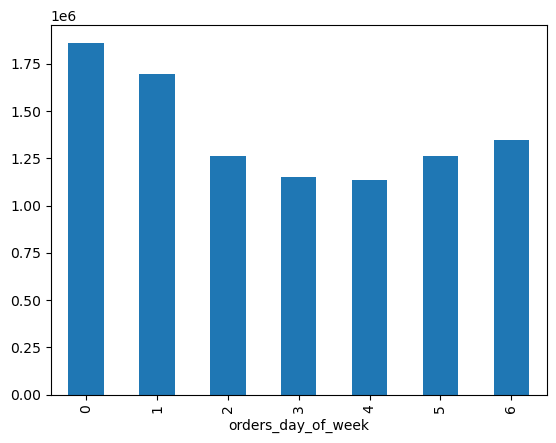

In [18]:
# Creating a bar chart for the column 'orders_day_of_week'
hist_orders_day_of_week = small['orders_day_of_week'].value_counts().sort_index().plot.bar()

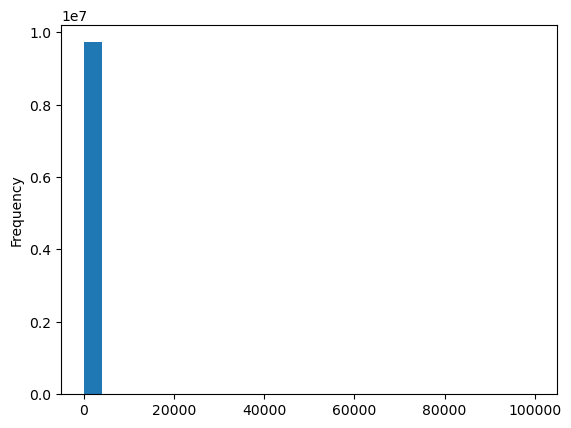

In [19]:
# Creating a Histogram for the 'prices' column
hist_prices = small['prices'].plot.hist(bins = 25)

In [20]:
# We should have gotten 25 bars (one for each bin). 
# Instead, however, we’ve gotten one single column. The reason for this has a lot to do with the data prep stage.

small['prices'].describe()

count    9.721098e+06
mean     1.206026e+01
std      5.035394e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [21]:
# We can see from above that the max value is too high.Lets do some more analysis.

# Finding the mean value for the 'prices' column

small['prices'].mean()

12.06026305876147

In [22]:
# Finding the median value for the 'prices' column

small['prices'].median()

7.4

In [23]:
# Finding the max value for the 'prices' column

small['prices'].max()

99999.0

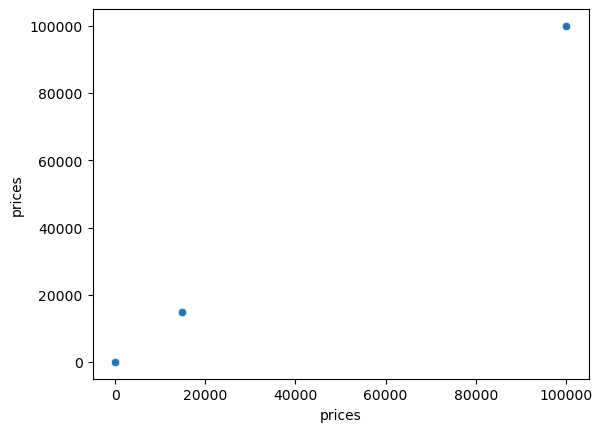

In [24]:
# While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result.
# How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data.


# When conducting an exploratory analysis, you can also use scatterplots to visualize the distribution of data points 
# in order to identify any outliers.This will reveal whether there are any outliers.So, lets create a scatterplot.

hist_scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = small)

In [ ]:
# The mean of the column is around 12, so you’d expect the data points to be distributed somewhere around this number. 
# There are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. 
# This close-to-100,000 value corresponds to the max value you identified in your checks.
# But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

In [26]:
# Imagining that the maximum price anyone would pay in a supermarket were around $100, then anything above that amount could be
# considered an outlier. 

small.loc[small['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,marital_status,income
22489,1578338,3819,6,2,13,30.0,21553,7,1,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Gregory,Cabrera,Male,Utah,69,1/26/2020,2,married,129749
30436,2977209,5218,8,4,15,12.0,21553,7,1,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Linda,Ali,Female,Iowa,29,5/23/2017,2,married,120566
30438,2203682,5218,10,5,11,2.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Linda,Ali,Female,Iowa,29,5/23/2017,2,married,120566
60558,2707541,10182,1,2,9,11.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Deborah,Potter,Female,Maryland,69,6/4/2018,1,married,515905
63655,580648,10662,13,3,11,9.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Arthur,Silva,Male,Arizona,45,9/12/2019,3,married,147917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272422,285306,136909,4,1,17,7.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Deborah,Dillon,Female,New Jersey,30,5/14/2017,2,married,161606
32272461,1733119,156508,3,6,13,22.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,Non-frequent customer,Sarah,Lu,Female,Rhode Island,18,11/7/2018,1,living with parents and siblings,257430
32284317,1254331,103352,1,4,15,11.0,33664,6,0,2 % Reduced Fat Milk,...,Non-frequent customer,Kathleen,Trevino,Female,New Mexico,41,10/8/2019,0,single,246094
32284333,2489526,106089,1,5,17,11.0,33664,4,0,2 % Reduced Fat Milk,...,Regular customer,Alan,Davidson,Male,District of Columbia,57,4/3/2019,1,married,215116


In [27]:
#From the output, we can see that there are 1548 rows with outlier observations (prices greater than $100).

#For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column. 
#To turn them into NaNs, use the following code:

small.loc[small['prices'] >100, 'prices'] = np.nan

In [28]:
# Finding the max value for the 'prices' column now

small['prices'].max()

25.0

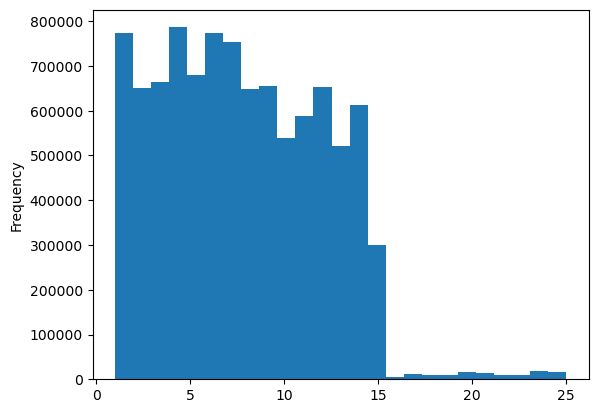

In [29]:
# Lets create a Histogram now

hist_1 = small['prices'].plot.hist(bins = 25)


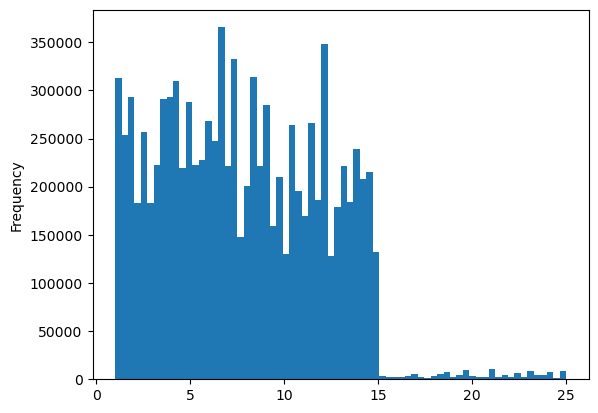

In [30]:
# To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. 
# This will result in a histogram with more, thinner columns:

hist_2 = small['prices'].plot.hist(bins = 70)

In [31]:
                        # Creating a Line Chart
    
# Reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.”
# This will speed up the processing time even further.

df_2 = small[['orders_day_of_week','prices']]

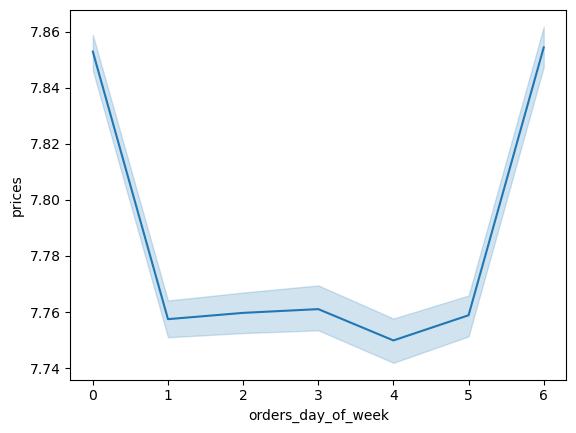

In [32]:
# Code to create the line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [ ]:
                         # Exercise 4.9 - Part 2 - Number 3

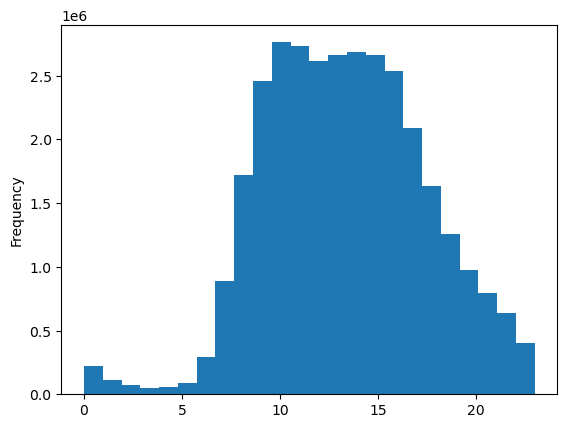

In [33]:
# Creating a Histogram for the 'order_hour_of_day'

histogram_order_hour_of_day = df_merged['order_hour_of_day'].plot.hist(bins = 24)

In [ ]:
# The histogram of "order_hour_ofday" illustrates the busiest hours for placing orders. The histogram demonstrates that the 
# hours between 9 am and 4 pm is the peak period for placing orders whereas the hours between 1 am and 6 am are the lowest. 
# Furthermore there is a steady decrease the the orders placed after 4 pm.

In [34]:
# Exporting the histogram
histogram_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'histogram_order_hour_of_day.png'))

In [ ]:
                     # Exercise 4.9 - Part 2 - Number 4

In [ ]:
# Create a bar chart from the "loyalty_flag" column

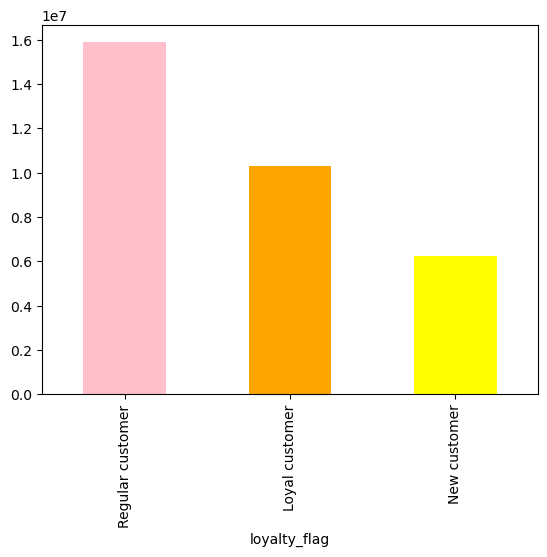

In [35]:
bar_loyalty_flag = df_merged['loyalty_flag'].value_counts().plot.bar(color = ['pink', 'orange', 'yellow'])


In [36]:
# Exporting the bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [ ]:
        ## Exercise 4.9 - Part 2 - Number 5 - Create a line chart using sample data


In [37]:
# working with the samples of merged df
df_merged_2 = small[['order_hour_of_day', 'prices']]

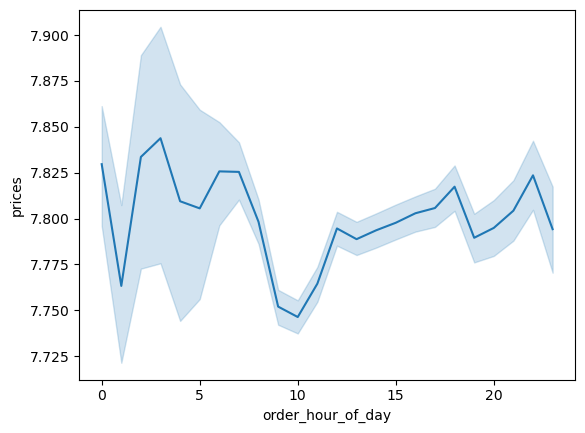

In [38]:
#creating the line graph
line_hour_of_day = sns.lineplot(data = df_merged_2, x = 'order_hour_of_day', y = 'prices')

In [39]:
#exporting line_hour_of_day
line_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day.png'))

In [ ]:
        ##  Exercise 4.9 - Part 2 - Number 6 - Create a line chart to determine connection between age and family situation

In [40]:
df_merged_3 = small[['age', 'num_of_dependants']]

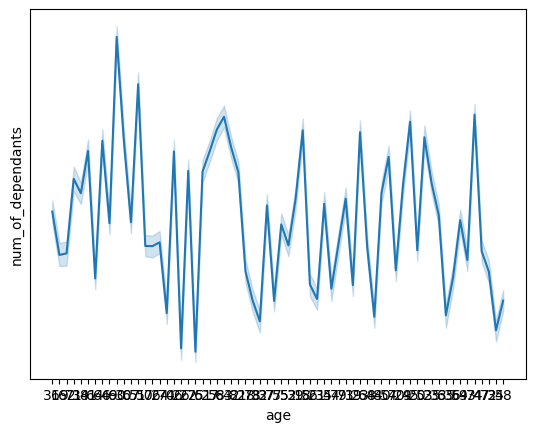

In [41]:
line_age_num_of_dependents = sns.lineplot(data = df_merged_3, x = 'age', y = 'num_of_dependants')

In [ ]:
# The line chart 'line_age_num_ofdependents' does not appear to depict any particular correlation between age and 
# the number of dependents

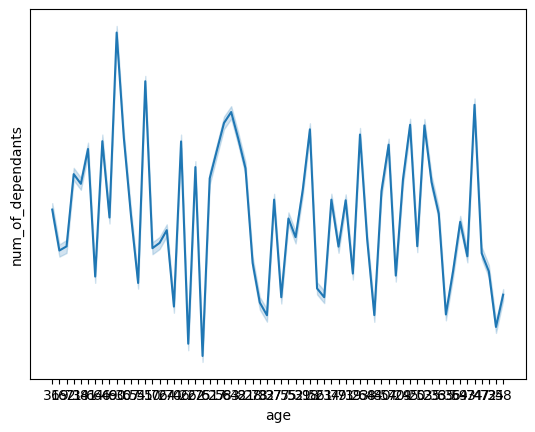

In [42]:
line_age_num_of_dependents1 = sns.lineplot(data = df_merged, x = 'age', y = 'num_of_dependants')

In [48]:
#exporting line_age_num_of_dependents
line_age_num_of_dependents1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_num_of_dependents1.png'))

In [ ]:
## Exercise 4.9 - Part 2 - Number 7 - Create a scatterplot between age and income

In [46]:
df_merged_4 = small[['age', 'income']]

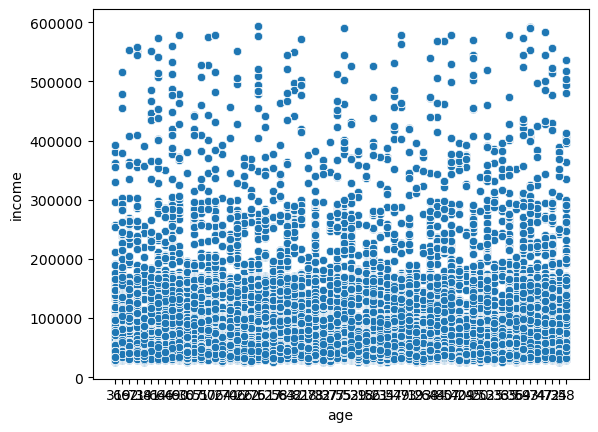

In [47]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_merged_4)

In [ ]:
#The scatterplot illustrates that the majority of individuals remain under 200000 in regards to income however 
#in older individuals aged 40-80 there are more outliers who have an much higher spending power over that of ages 20-39.
#The scatterplot shows that once individuals turn 40 their potential earns would change from 400000 to 600000. 
#As such the scatterplot between age and income depicts that 
#there is a correlation between the two

In [49]:
#exporting scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))